In [1]:
#Made with ❤️ by Ben🦊 and Totof

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
%matplotlib inline

file = '4AmazonToys.csv'

#Data Frame
df = pd.read_csv(file)
#We are backing up the dataframe to compare initial values with processed values
df_backup = df.copy()


#Call DataFrame
#-> df

#All attributes required for the dataframe analysis
"""
We are keeping only certain categories that can be exploited in the data analysis.

We are dropping these categories :
- unique_id : code that doesn't give any information about the product
- customers_who_bought_this_item_also_bought : the information is only a weblink. We could have tried to exploit this data by searching in these links, but most of them are pointing to deleted product pages, or we don't have the tools to extract futher data from webpages
- items_customers_buy_after_viewing_this_item : the information is only a weblink. We could have tried to exploit this data by searching in these links, but most of them are pointing to deleted product pages, or we don't have the tools to extract futher data from webpages

"""
attribute_information = ['product_name','manufacturer','price','number_available_in_stock','number_of_reviews','number_of_answered_questions','average_review_rating','amazon_category_and_sub_category','description','product_information','product_description','customer_questions_and_answers','customer_reviews','sellers']

#Delete not useful attributes
for column in df.columns:
    if column not in attribute_information:
        df.drop(column,axis=1,inplace=True)        

#Convert and clean Price
def clean_price(x):
    try:
        #Delete £ symbol
        if x.startswith('£'):
            #print(x)
            x = x.replace('£', '')
            #print(x)
            #Replace interval prices by mean of interval
            if '-' in x:
                price = np.mean([float(s.replace(',', '')) for s in x.split(' - ')])
            else:
                if ',' in x:
                    x = x.split('.')[0].replace(',', '')

                #Convert price to float
                price = float(x)

        return price
    except AttributeError:
        return np.nan

    
#Clean number of reviews
def clean_number_of_reviews(x):
    try:
        return float(x.replace(',', ''))
    except AttributeError:
        return np.nan
    
#Clean Average Review Rating
def clean_rating(x):
    if pd.isnull(x):
        return np.nan
    else:
        return float(x.split(' ')[0])
    
#Clean available in stock
"""
Available in stock is a data containing a number and a type : "5 new" for example 
The information can be seen as a tuple (num, type)
We create 2 new categories : number_available_in_stock_num and number_available_in_stock_type
num containing the numerical data
type containing the type data (new, refurbished, used...)
"""
def clean_available_in_stock(x):
    if pd.isnull(x):
        return np.nan, np.nan
    else:
        x1, x2 = tuple(x.split('\xa0'))
        return float(x1), x2

    
#APPLY CLEAN FUNCTIONS ON :

#Price
df['price'] = df['price'].apply(clean_price)    

#Number Reviews
df['number_of_reviews'] = df['number_of_reviews'].apply(clean_number_of_reviews)
    
#Average Review Rating
df['average_review_rating'] = df['average_review_rating'].apply(clean_rating)
    
#Available in stock
df['number_available_in_stock_num'] = [clean_available_in_stock(v)[0] for v in df['number_available_in_stock'].values]
df['number_available_in_stock_type'] = [clean_available_in_stock(v)[1] for v in df['number_available_in_stock'].values]
df.drop('number_available_in_stock', axis=1, inplace = True) #we drop the old category

#END OF APPLY CLEAN

#Show all attributes
print("Dataframe contains", len(df.columns), "categories")
print(df.columns)

#____DOCU

#.quantile(x)
#.std(x)
#.describe()
#df['column'].loc[row]
#df['price'].describe()
#len(list(df['manufacturer'].unique()))

Dataframe contains 15 categories
Index(['product_name', 'manufacturer', 'price', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'description',
       'product_information', 'product_description',
       'customer_questions_and_answers', 'customer_reviews', 'sellers',
       'number_available_in_stock_num', 'number_available_in_stock_type'],
      dtype='object')


In [2]:
#This is the cleaned dataframe
df

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_questions_and_answers,customer_reviews,sellers,number_available_in_stock_num,number_available_in_stock_type
0,Hornby 2014 Catalogue,Hornby,3.42,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,3.0,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig...",5.0,new
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,1.0,3.0,4.0,Characters & Brands > Star Wars > Toys,NaN,Technical Details Additional Information AS...,NaN,NaN,... what I see my grandson us going to have fu...,NaN,NaN,NaN
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,1.0,3.0,5.0,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,NaN,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""YUK"", ""Seller_p...",3.0,new
9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,1.0,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,The best sculpt in a while // 5.0 // 13 May 20...,"{""seller""=>[{""Seller_name_1""=>""Smaller World F...",3.0,new


## -------------- PRICE -------------- 

3193    8140.30
7094    2439.00
2228     995.11
9176     719.95
7679     648.95
5663     629.95
6090     592.95
5894     568.12
188      538.73
3569     486.95
Name: price, dtype: float64


<AxesSubplot:>

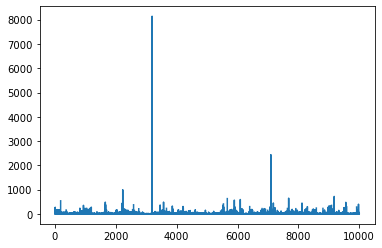

In [3]:
#____PRICE GRAPH____

"""
x-axis : index of cell
y-axis : price

We can clearly see the 3 highest outliers (details described below)
"""

#Show the 10 highest prices (index, price)
print(df['price'].sort_values(ascending=False).head(10))

#
df['price'].plot()

count    8565.000000
mean       21.277768
std        99.317922
min         0.010000
25%         4.990000
50%        10.640000
75%        19.990000
max      8140.300000
Name: price, dtype: float64

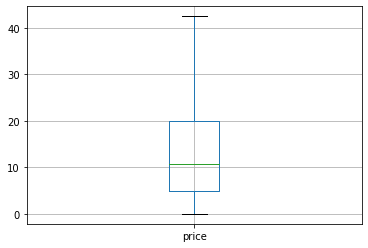

In [4]:
#We hide the outliers because we can already see them in the previous graph and they would make the boxplot less readable
df[['price']].boxplot(showfliers = False)
df['price'].describe()

#### -------------- PRICE OUTLIERS --------------

In [5]:
"""
#3193
Strange price outlier at this cell
Price : 12.60 - 16 268.00
By processing the data, we are changing interval prices in mean -> price[3193] = 8140.30
Important to keep an eye on backup dataframe when checking this entry

Product is a Lego Morphsuit costume (latex costume)
"""
print("#3193 \n")
#Data not processed
print("Raw \n\n" , df_backup.loc[3193], "\n\n")
#Data processed
print("Processed \n\n" , df.loc[3193])
print('\n ------------------------------- \n')

#3193 

Raw 

 uniq_id                                                         f2c35a30d2c363d09d0a6b26106f1693
product_name                                           Morhsuits Childrens Mr Block Head Costume
manufacturer                                                                          Morphsuits
price                                                                        £12.60 - £16,268.00
number_available_in_stock                                                                    NaN
number_of_reviews                                                                              9
number_of_answered_questions                                                                  12
average_review_rating                                                         4.4 out of 5 stars
amazon_category_and_sub_category                                                             NaN
customers_who_bought_this_item_also_bought     http://www.amazon.co.uk/Morphsuits | http://ww...
description    

In [6]:
"""
---------
#7094
Marvel Thor statue that costs 2439.92
"""
print("#7094 \n")
#Data not processed
print("Raw \n\n" , df_backup.loc[7094], "\n\n")
#Data processed
print("Processed \n\n" , df.loc[7094])
print('\n ------------------------------- \n')

#7094 

Raw 

 uniq_id                                                         75d96583894e50412ba5c0161375fef5
product_name                                   Bowen Designs - Marvel Statue Thor Classic Act...
manufacturer                                                                       Bowen Designs
price                                                                                  £2,439.92
number_available_in_stock                                                                  2 new
number_of_reviews                                                                              1
number_of_answered_questions                                                                   1
average_review_rating                                                         4.0 out of 5 stars
amazon_category_and_sub_category               Hobbies > Model Trains & Railway Sets > Access...
customers_who_bought_this_item_also_bought     http://www.amazon.co.uk/Kotobukiya | http://ww...
description    

In [7]:
"""
---------
#2228
Drone DJI Phantom 2 that costs 995.11
"""
print("#2228 \n")
#Data not processed
print("Raw \n\n" , df_backup.loc[2228], "\n\n")
#Data processed
print("Processed \n\n" , df.loc[2228])
print('\n ------------------------------- \n')

#2228 

Raw 

 uniq_id                                                         4f705c302bdcf5d2b0c1df973d98f99f
product_name                                                     DJI Phantom 2 with H3-3D Gimbal
manufacturer                                                                                 DJI
price                                                                                    £995.11
number_available_in_stock                                                                 2 used
number_of_reviews                                                                              4
number_of_answered_questions                                                                  19
average_review_rating                                                         5.0 out of 5 stars
amazon_category_and_sub_category               Hobbies > Remote Controlled Devices > Helicopt...
customers_who_bought_this_item_also_bought     http://www.amazon.co.uk/Propellers | http://ww...
description    

## -------------- MANUFACTURER -------------- 

In [8]:
#____MANUFACTURER GRAPH____

"""
The 10 manufacturer with most of the products registered in Amazon
"""

manufacturer = df.groupby(['manufacturer']).count()
print("Number of unique manufacturer : ",len(df['manufacturer'].unique()), "\n")
manufacturer[['product_name']].sort_values(ascending = False, by = 'product_name').head(10)

Number of unique manufacturer :  2652 



,product_name
manufacturer,
LEGO,171
Disney,167
Oxford Diecast,156
Playmobil,147
Star Wars,120
Mattel,114
Hasbro,110
The Puppet Company,109
MyTinyWorld,93


## -------------- NUMBER AVAILABLE IN STOCK -------------- 

2497    92.0
2483    86.0
2535    78.0
2518    74.0
625     73.0
8831    73.0
2559    73.0
760     72.0
2453    71.0
8162    70.0
Name: number_available_in_stock_num, dtype: float64


<AxesSubplot:>

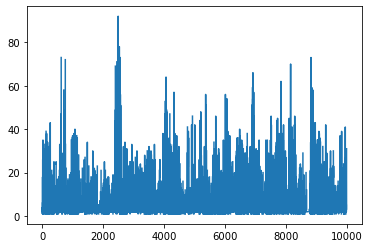

In [9]:
#____STOCK NUM GRAPH____

"""
x-axis : index of cell
y-axis : number available in stock
"""

#Show the 10 highest stocks (index, stock)
print(df['number_available_in_stock_num'].sort_values(ascending=False).head(10))

#
df['number_available_in_stock_num'].plot()

count    7500.000000
mean        7.916933
std         8.805777
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        92.000000
Name: number_available_in_stock_num, dtype: float64

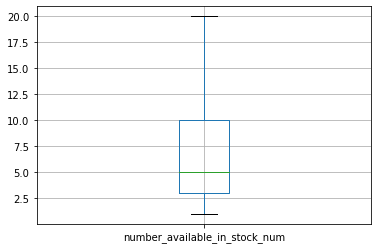

In [10]:
#We hide the outliers because we can already see them in the previous graph and they would make the boxplot less readable
df[['number_available_in_stock_num']].boxplot(showfliers = False)
df['number_available_in_stock_num'].describe()

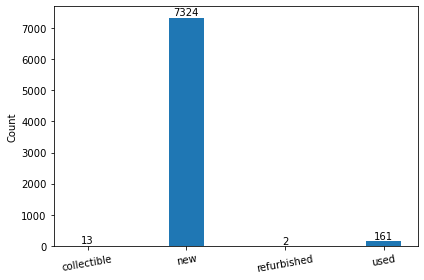

In [11]:
#____STOCK TYPE GRAPH____

"""

"""

#
num_stock_type = df.groupby(['number_available_in_stock_type']).count()[['product_name']]
num_stock_type.columns = ["count"]

labels = num_stock_type.index
data = num_stock_type['count'].values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, data, width, label='Count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 10)

for rect, label in zip(rects1, data):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

fig.tight_layout()

## -------------- NUMBER OF REVIEWS -------------- 

9315    1399.0
8872    1040.0
1255     802.0
9338     690.0
1931     649.0
1586     600.0
7293     585.0
6576     561.0
1369     518.0
4493     517.0
Name: number_of_reviews, dtype: float64


<AxesSubplot:>

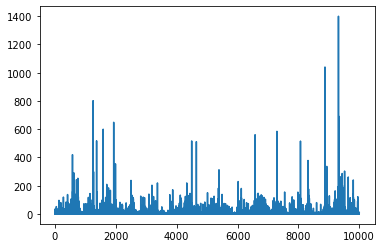

In [12]:
#____NUMBER OF REVIEWS GRAPH____

"""
x-axis : index of cell
y-axis : quantity of reviews
"""

#Show the 10 products with highest reviews (index, reviews)
print(df['number_of_reviews'].sort_values(ascending=False).head(10))

df['number_of_reviews'].plot()

count    8565.000000
mean       21.277768
std        99.317922
min         0.010000
25%         4.990000
50%        10.640000
75%        19.990000
max      8140.300000
Name: price, dtype: float64

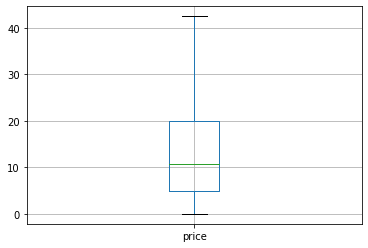

In [13]:
df[['price']].boxplot(showfliers = False)
df['price'].describe()

## -------------- AVERAGE REVIEW RATING -------------- 

7090    2.3
3883    3.0
2829    3.0
1422    3.0
2206    3.3
9825    3.3
860     3.5
2032    3.5
6595    3.6
5241    3.6
Name: average_review_rating, dtype: float64


<AxesSubplot:>

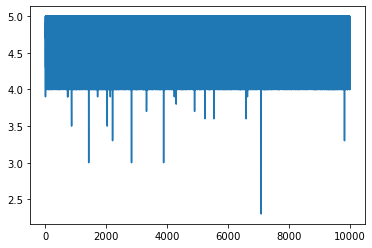

In [14]:
#____AVERAGE REVIEW RATING GRAPH____

"""
x-axis : index of cell
y-axis : review rating
"""

#Show the 10 products with lowest review rating (index, reviews)
print(df['average_review_rating'].sort_values(ascending=True).head(10))

#This graph is very interesting, because it clearly shows the outliers (the products with low review rating)
#The blue box represents the large majority of products that have a 4 - 5 stars review rate
df['average_review_rating'].plot()

count    9982.000000
mean        4.707283
std         0.372279
min         2.300000
25%         4.500000
50%         5.000000
75%         5.000000
max         5.000000
Name: average_review_rating, dtype: float64

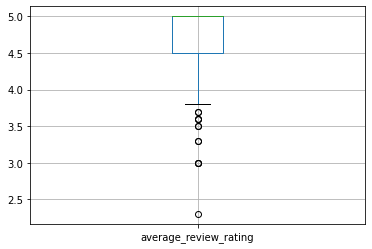

In [15]:
df[['average_review_rating']].boxplot(showfliers = True) #We intentionally show the outliers in this boxplot
df['average_review_rating'].describe()

## -------------- NUMBER ANSWERED QUESTIONS -------------- 

1272    39.0
1274    39.0
1280    39.0
1279    39.0
1278    39.0
1277    39.0
1276    39.0
1275    39.0
1273    39.0
1282    39.0
1271    39.0
1270    39.0
1269    39.0
1281    39.0
1247    28.0
1246    28.0
1245    28.0
1248    28.0
1263    23.0
1260    23.0
Name: number_of_answered_questions, dtype: float64


<AxesSubplot:>

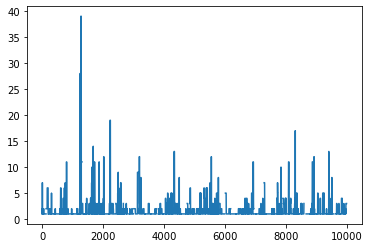

In [16]:
#____NUMBER OF ANSWERED QUESTIONS GRAPH____

"""
x-axis : index of cell
y-axis : number of answered questions
"""

#Show the 10 products with lowest review rating (index, reviews)
print(df['number_of_answered_questions'].sort_values(ascending=False).head(20))

#This graph is very interesting, because it clearly shows the outliers (the products with low review rating)
#The blue box represents the large majority of products that have a 4 - 5 stars review rate
df['number_of_answered_questions'].plot()

count    9235.000000
mean        1.834976
std         2.517268
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        39.000000
Name: number_of_answered_questions, dtype: float64

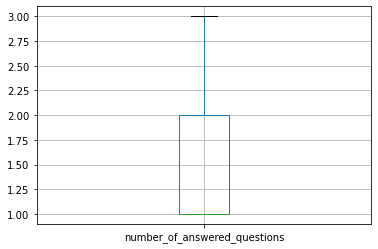

In [17]:
df[['number_of_answered_questions']].boxplot(showfliers = False)
df['number_of_answered_questions'].describe()

## -------------- SENTIMENT ANALYSIS -------------- 

In [18]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


count    9979.000000
mean        0.347844
std         0.194137
min        -0.540625
25%         0.221887
50%         0.348056
75%         0.471168
max         1.000000
Name: sentiment, dtype: float64


,sentiment,average_review_rating
sentiment,1.00000,0.19875
average_review_rating,0.19875,1.00000


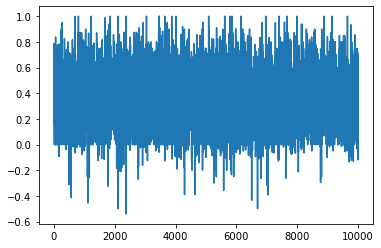

In [19]:
from textblob import TextBlob

df['sentiment'] = [sum([TextBlob(sentence).sentiment.polarity for sentence in df['customer_reviews'].loc[i].split(' // ')[::4]]) / len(df['customer_reviews'].loc[i].split(' // ')[::4]) if not pd.isnull(df['customer_reviews'].loc[i]) else np.nan for i in df.index]
print(df['sentiment'].describe())
df['sentiment'].plot()
df[['sentiment','average_review_rating']].corr()

### Sentiment analysis = 1 (max positive)

In [20]:
print("Reviews with a sentiment analysis = 1 : ",df[df['sentiment'] == 1]['customer_reviews'].count())
print("\n\n ------------ \n\n")
print("Count of all reviews with sentiment analysis = 1 \n",df[df['sentiment'] == 1]['customer_reviews'])
print("\n\n ------------ \n\n")
print("Example, Review index 704 \n",df[df['sentiment'] == 1]['customer_reviews'].loc[704])

Reviews with a sentiment analysis = 1 :  24


 ------------ 


Count of all reviews with sentiment analysis = 1 
 704     Best advent calendar we've ever had // 5.0 // ...
809     Awesome // 5.0 // 30 Jan. 2015 // By\n    \n  ...
1231    Excellent // 5.0 // 16 Dec. 2014 // By\n    \n...
1856    Great!!!! // 5.0 // 18 Nov. 2014 // By\n    \n...
2106    Arrived on time Aston perfect model and stays ...
2378    Perfect, came 2 day of between dates // 5.0 //...
3045    Awesome quality! // 5.0 // 5 April 2016 // By\...
3462    Excellent model // 5.0 // 16 Feb. 2015 // By\n...
3465    wonderful // 5.0 // 3 Jan. 2016 // By\n    \n ...
3655    Superb! // 5.0 // 22 Dec. 2015 // By\n    \n  ...
3874    Excellent // 5.0 // 28 July 2014 // By\n    \n...
4014    Very happy. // 5.0 // 20 Jan. 2016 // By\n    ...
5088    Perfect // 5.0 // 15 Jun. 2015 // By\n    \n  ...
5615    Awesome // 5.0 // 20 Mar. 2016 // By\n    \n  ...
5789    arrived in excellent wrapped condition // 5.0 ...
5856    Excellen

### Sentiment analysis >= 0.5 (highly positive)

In [21]:
print("Reviews with a sentiment analysis >= 0.5 : ",df[df['sentiment'] >= 0.5]['customer_reviews'].count())
print("\n\n ------------ \n\n")
print("Count of all reviews with sentiment analysis >= 0.5 \n",df[df['sentiment'] >= 0.5]['customer_reviews'])
print("\n\n ------------ \n\n")
print("Example, Review index 1 \n",df[df['sentiment'] >= 0.5]['customer_reviews'].loc[1])

Reviews with a sentiment analysis >= 0.5 :  2172


 ------------ 


Count of all reviews with sentiment analysis >= 0.5 
 1       Four Stars // 4.0 // 18 Dec. 2015 // By\n    \...
3       I love it // 5.0 // 22 July 2013 // By\n    \n...
10      steaming good engine! // 5.0 // 11 Jan. 2016 /...
13      Gods Wonderful Railway. // 5.0 // 29 Oct. 2014...
20      An excellent HO scale diorama piece // 5.0 // ...
                              ...                        
9981    Perfect fit // 5.0 // 13 Jun. 2015 // By\n    ...
9983    This figure is great, Harley looks adorable //...
9984    great mini clone! // 5.0 // 5 April 2013 // By...
9992    brilliant sculpt // 5.0 // 13 Sept. 2010 // By...
9997    Five Stars // 5.0 // 18 Dec. 2015 // By\n    \...
Name: customer_reviews, Length: 2172, dtype: object


 ------------ 


Example, Review index 1 
 Four Stars // 4.0 // 18 Dec. 2015 // By
    
    kenneth bell
  
 on 18 Dec. 2015 // Very happy with the communication with funkybuys | Five St

### Sentiment analysis <= -0.2 (highly negative)

In [22]:
print("Reviews with a sentiment analysis <= -0.2 : ",df[df['sentiment'] <= -0.2]['customer_reviews'].count())
print("\n\n ------------ \n\n")
print("Count of all reviews with sentiment analysis <= -0.2 \n",df[df['sentiment'] <= -0.2]['customer_reviews'])
print("\n\n ------------ \n\n")
print("Example, Review index 19 \n",df[df['sentiment'] <= -0.2]['customer_reviews'].loc[500])

Reviews with a sentiment analysis <= -0.2 :  30


 ------------ 


Count of all reviews with sentiment analysis <= -0.2 
 500     Five Stars // 5.0 // 4 April 2016 // By\n    \...
573     but nothing so bad that it affects the rolls /...
1105    my sad sad collection // 5.0 // 9 Nov. 2010 //...
1121    "Stop Grievous!" // 5.0 // 3 Nov. 2007 // By\n...
1167    Poor value foe money // 5.0 // 17 Jan. 2015 //...
1780    bestway lazy turtle // 5.0 // 1 Aug. 2010 // B...
2114    Wrong size // 4.0 // 21 Feb. 2016 // By\n    \...
2161    Drifts a bit too much // 4.0 // 29 Dec. 2015 /...
2211    But idid not fit it not your fote the drone .....
2217    Seen some pretty bad reviews about GemFan in t...
2376    Nasty catch here // 4.0 // 7 Jan. 2016 // By\n...
2777    Crazy Bones England 2010 // 5.0 // 16 Nov. 201...
4295    not as described // 5.0 // 6 Sept. 2015 // By\...
4639    Ugly fun.. // 5.0 // 11 Dec. 2014 // By\n    \...
4886    Five Stars // 5.0 // 26 Oct. 2014 // By\n    \...
5267    

\
\
\
\
\
\
\
\
\
\
\
\
## ----- MY DRAFTS -----
This is a few functions I used to check information, type of data..
They are not very important but I thought that it would be interesting to leave them here.

<AxesSubplot:>

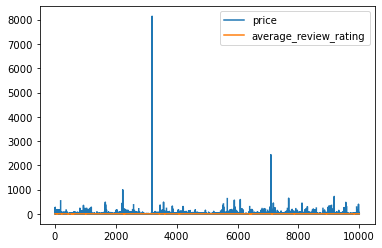

In [40]:
df[['price','average_review_rating']].plot()

In [126]:
#Outlier tester
n = 2228

print("Raw \n\n" , df_backup.loc[n], "\n \n --------- \n")
print("Processed \n\n" , df.loc[n])

Raw 

 uniq_id                                                         4f705c302bdcf5d2b0c1df973d98f99f
product_name                                                     DJI Phantom 2 with H3-3D Gimbal
manufacturer                                                                                 DJI
price                                                                                    £995.11
number_available_in_stock                                                                 2 used
number_of_reviews                                                                              4
number_of_answered_questions                                                                  19
average_review_rating                                                         5.0 out of 5 stars
amazon_category_and_sub_category               Hobbies > Remote Controlled Devices > Helicopt...
customers_who_bought_this_item_also_bought     http://www.amazon.co.uk/Propellers | http://ww...
description            

In [127]:
name = 'number_of_answered_questions'


print(df[name], "\n")
print(df[name].describe())

0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
9995    3.0
9996    3.0
9997    3.0
9998    3.0
9999    3.0
Name: number_of_answered_questions, Length: 10000, dtype: float64 

count    9235.000000
mean        1.834976
std         2.517268
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        39.000000
Name: number_of_answered_questions, dtype: float64


In [128]:
df['customer_reviews'].loc[0].split(' // ')[::4]

['Worth Buying For The Pictures Alone (As Ever)',
 "Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. | Amazing detail fabulous photography.",
 "Amazing detail, every credit to the photographer in this book, a worthy reference manual, as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. | 'Great Purchase'",
 'This was purchased on behalf of my Dad. He is always asking me to look up 00 gauge engines online, so this has been a good buy as he can look at it anytime. Would definitel